In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#t = np.fromfile('./tensor_dims-22_dtype-complex128.bin')
t = np.fromfile('./tensor_dims-14_dtype-complex128.bin')

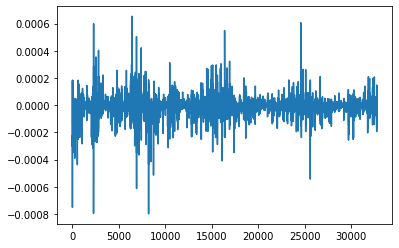

In [51]:
plt.plot(t.real)

array([0., 0., 0., ..., 0., 0., 0.])

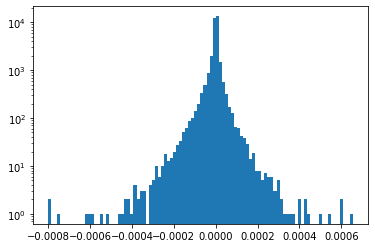

In [52]:
_ = plt.hist(t.real, bins=100)
plt.yscale('log')

/home/plate/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


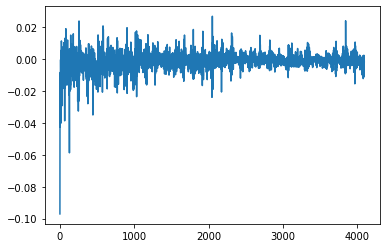

In [53]:
tft = np.fft.fft(t)
plt.plot(tft[:32*128])

In [103]:
tft_cmp = tft.copy()
tft_cmp[np.abs(tft)<0.006] = 0
sum(tft_cmp==0)/tft_cmp.size

0.7669677734375

In [104]:
t_cmp = np.fft.ifft(tft_cmp).real

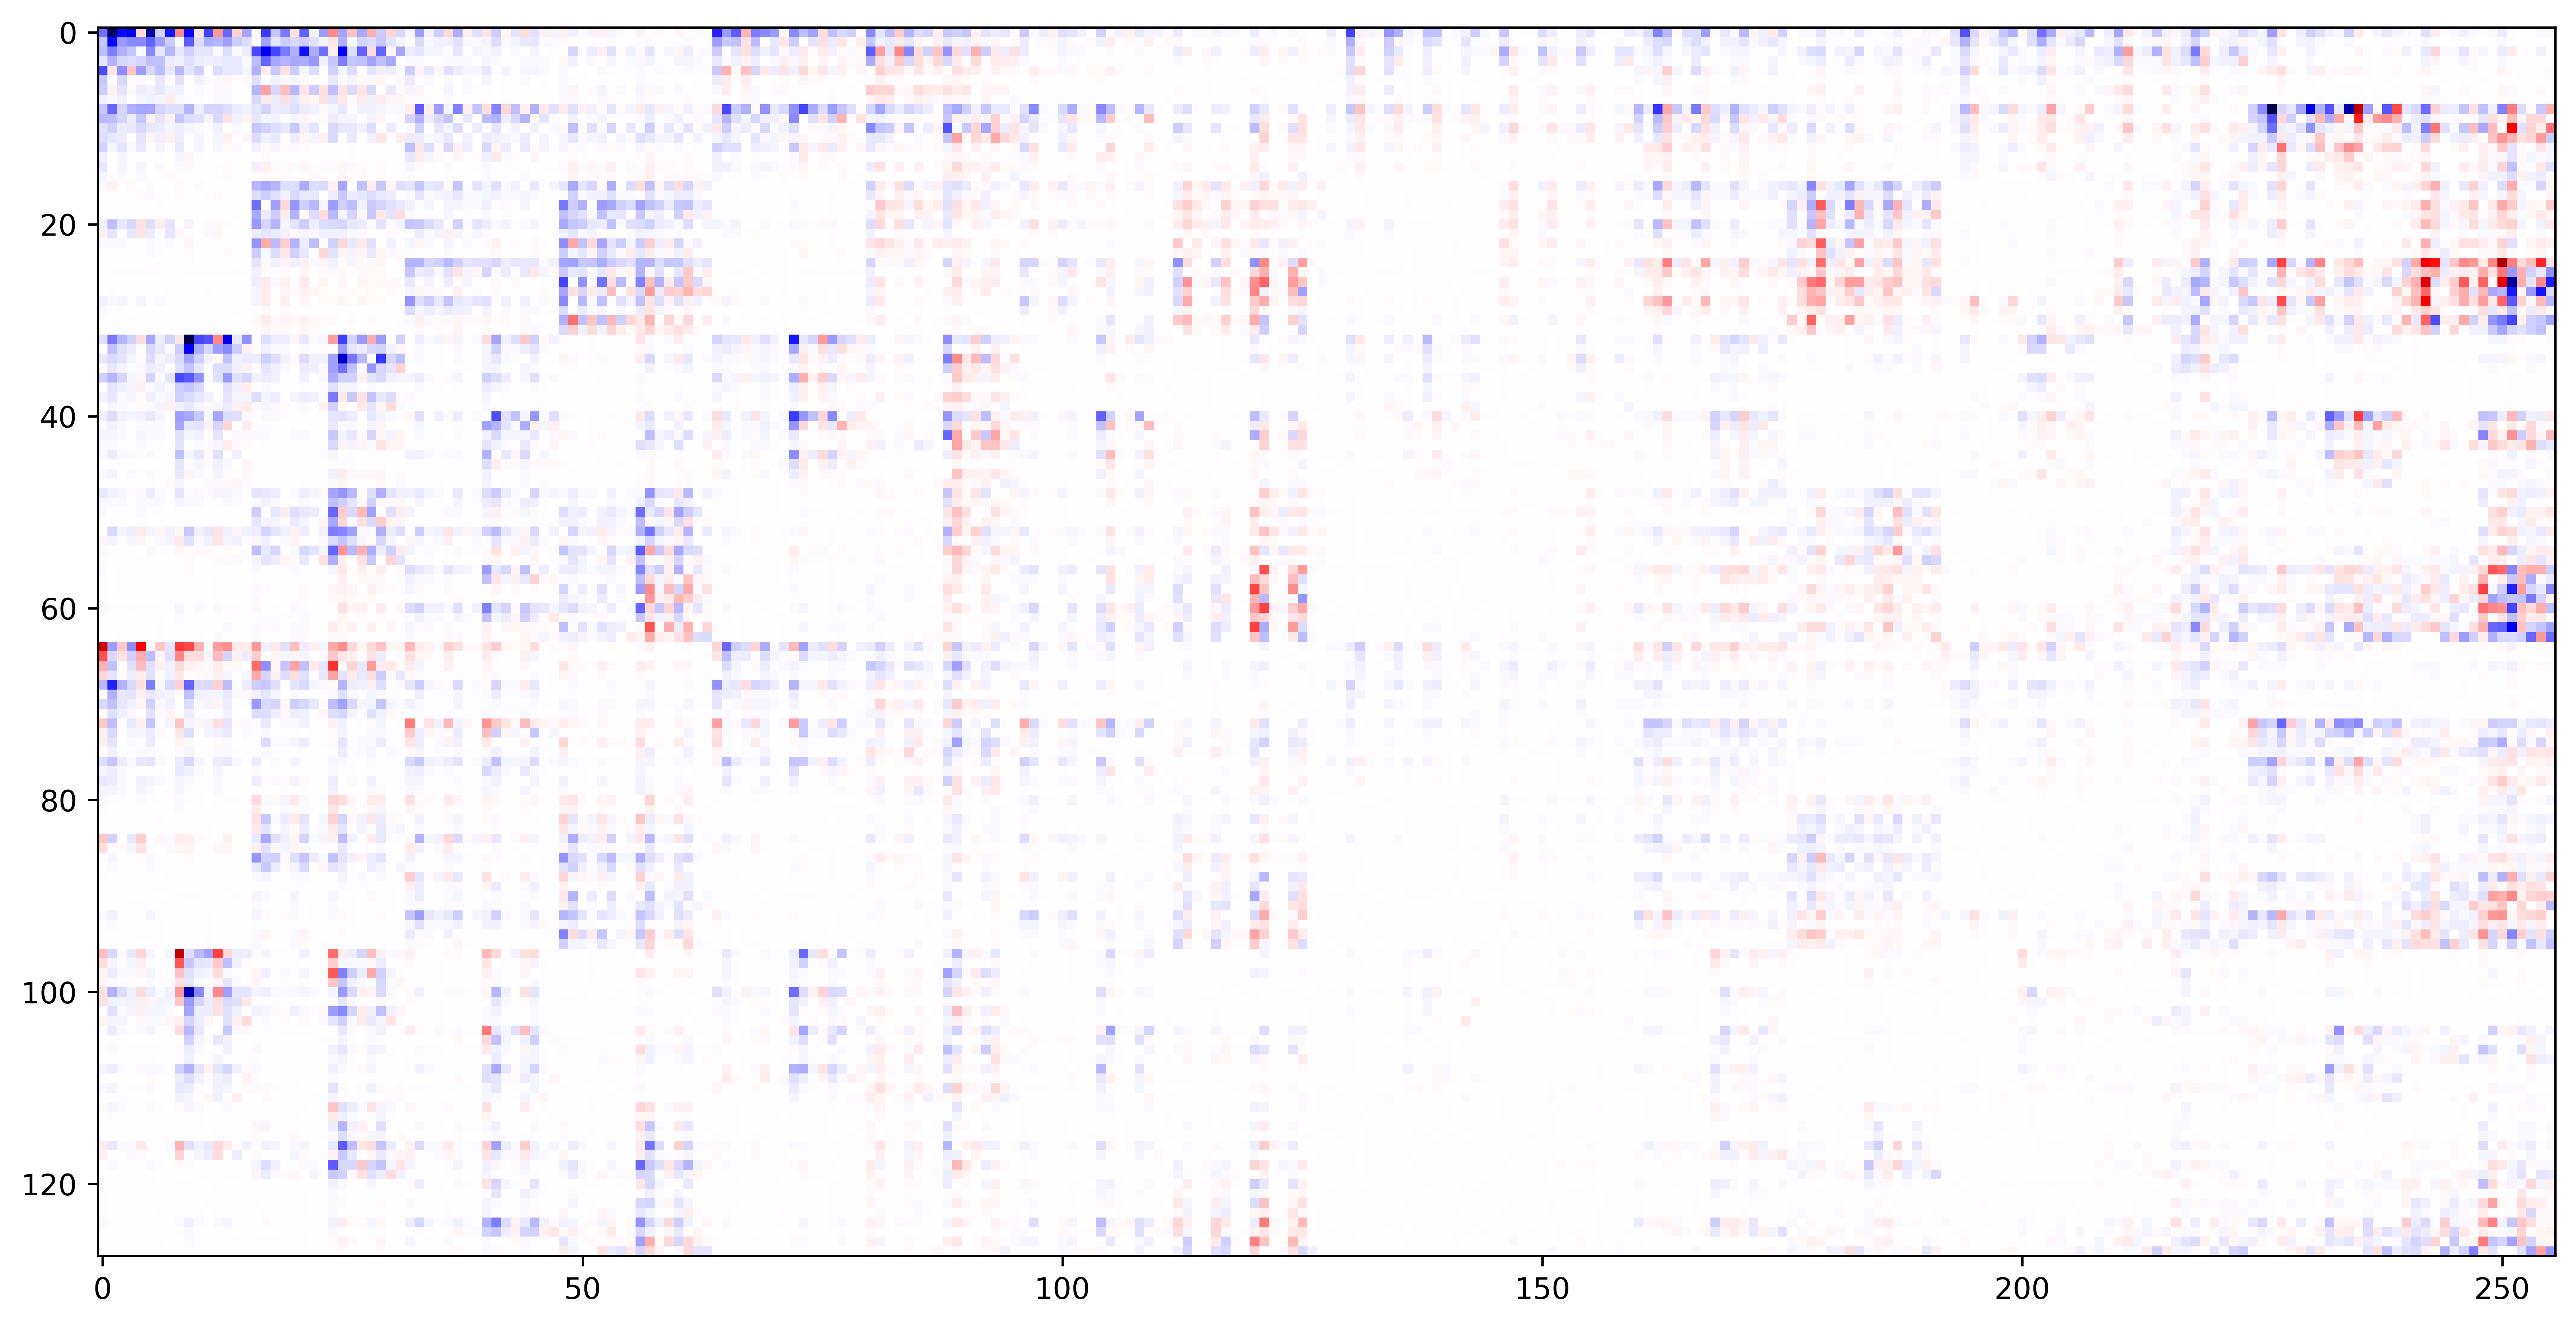

In [101]:
t2d = t.reshape(2*64, -1)
fig = plt.figure(figsize=(15, 12), dpi=600)
mx = max(-np.min(t2d), np.max(t2d))
plt.imshow(t2d, cmap='seismic', vmin=-mx, vmax=mx)
#plt.savefig('img.svg')

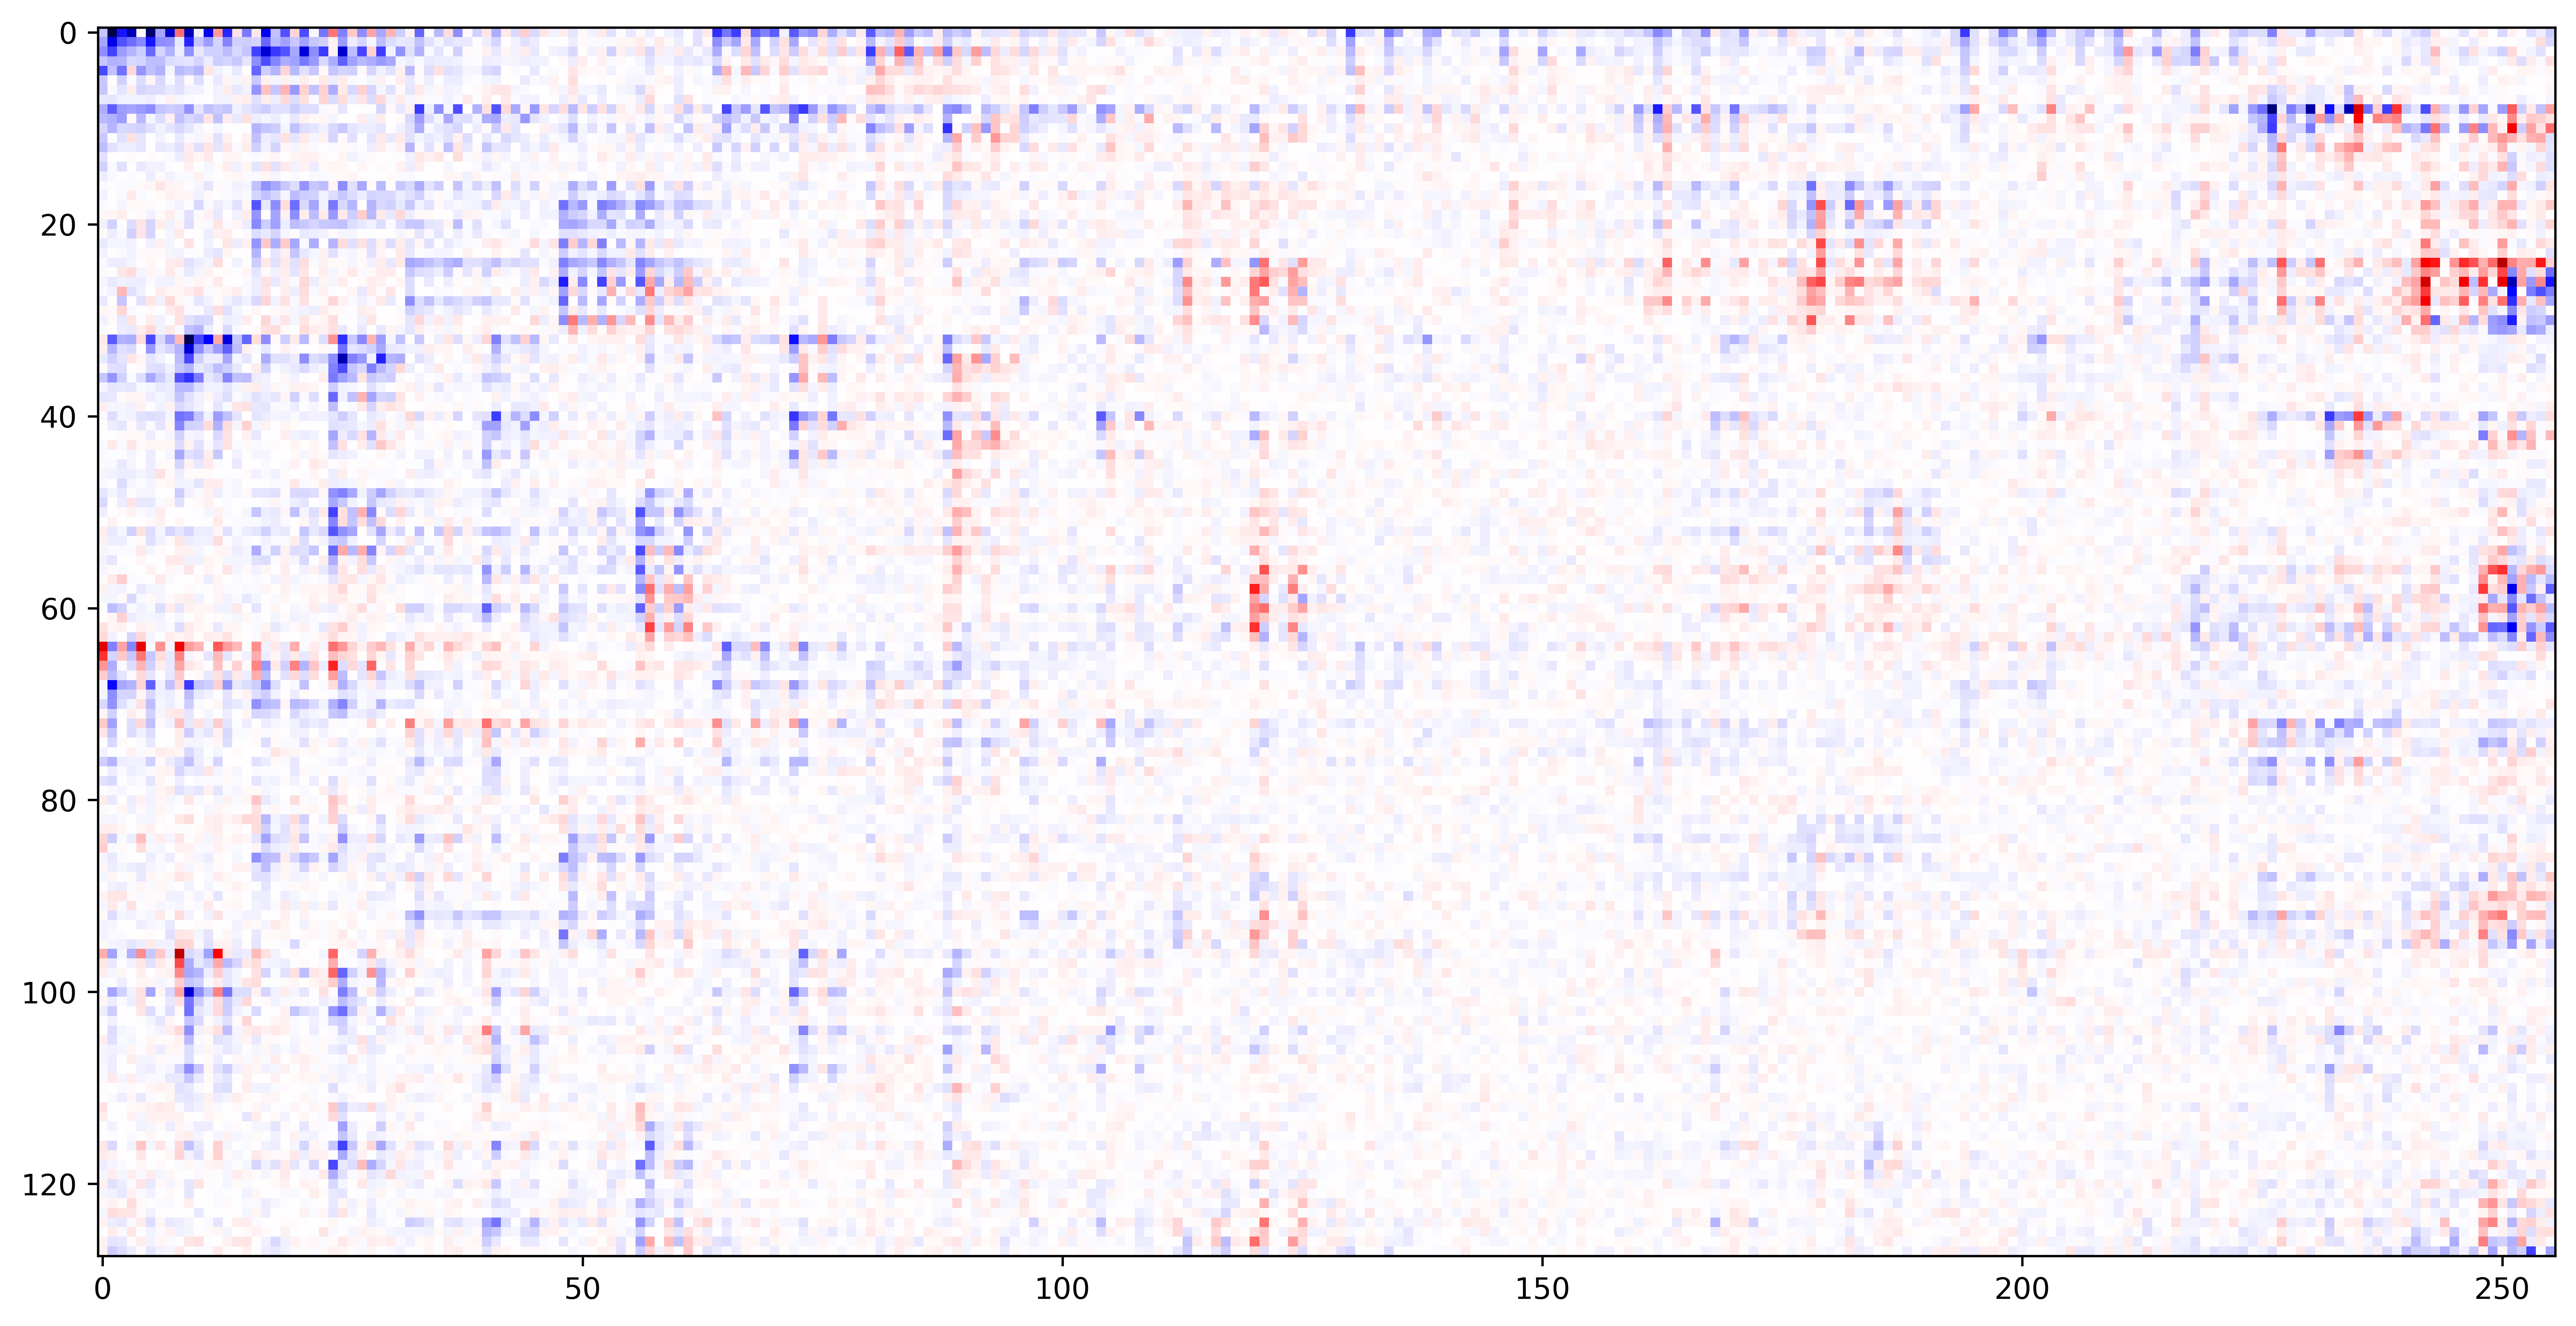

In [105]:
t2d = t_cmp.reshape(2*64, -1)
fig = plt.figure(figsize=(15, 12), dpi=600)
mx = max(-np.min(t2d), np.max(t2d))
plt.imshow(t2d, cmap='seismic', vmin=-mx, vmax=mx)
#plt.savefig('img.svg')

In [65]:
lg = sum(np.abs(t)>mx*0.05)
print('Ratio', lg/t.size)

Ratio 0.086761474609375


## Possible approximate contractions

## Compress the tensors

Suppose we have an algorithm that takes a tensor $T$, and returns a compressed data $T'$: $C(T) = D$, while the output tensor is compressed in some clever way. 
There also should be a decompression algorithm, which takes the data and returns a (decompressed) tensor. $C^{-1}(D) = T'$, while $T'$ may also contain some noise or in general has fewer information.

## Approximate tensor contraction

For a tensor network $\mathcal T$, construct another TN $\mathcal T'$ which results in a similar result, but with smaller memory overhead. 

